## Exercice 1 :Implementation d'un perceptron multicouche avec TensorFlow & Keras


### 1- Importation des bibliothèques necessaire pour ce travail
Dans cette section, les bibliothèques nécessaires pour le travail sont importées. Ces bibliothèques comprennent TensorFlow et Keras pour la mise en œuvre du modèle de réseau neuronal, ainsi que des bibliothèques de manipulation de données comme NumPy et des outils de visualisation comme Matplotlib.
s.

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
 
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

plt.rcParams['axes.titlesize'] = 16 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

KeyboardInterrupt: 

In [ ]:
SEED_VALUE = 42
 
#une graine aléatoire est fixée pour garantir la reproductibilité des résultats..
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
#Chargement de la base de données MNIST
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

#Séparation des données de validation
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]
 
y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]
 
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

In [ ]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

## 2- Prétraitement des données
Dans cette section, les données d'entraînement, de validation et de test sont prétraitées. Les images sont normalisées pour être dans la plage [0,1], et les étiquettes sont converties en encodage one-hot pour les catégoriser correctement.

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255
 
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255
     
X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

In [ ]:
# chargement de la base de donnée Fashion MNIST
((X_train_fashion, y_train_fashion), (_, _)) = fashion_mnist.load_data()
 
print(y_train_fashion[0:9])

In [ ]:
#Conversion des données d'entrainement en encodage one hot
y_train_onehot = to_categorical(y_train_fashion[0:9])
print(y_train_onehot)

In [ ]:
#Conversion des données en encodage one hot
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

## 3- Architecture du modèle
Cette section définit l'architecture du modèle à l'aide de l'API séquentielle de Keras. Le modèle est composé de trois couches entièrement connectées (dense), avec des fonctions d'activation non linéaire à l'instar de ReLU pour les couches cachées et une fonction d'activation softmax pour la couche de sortie.

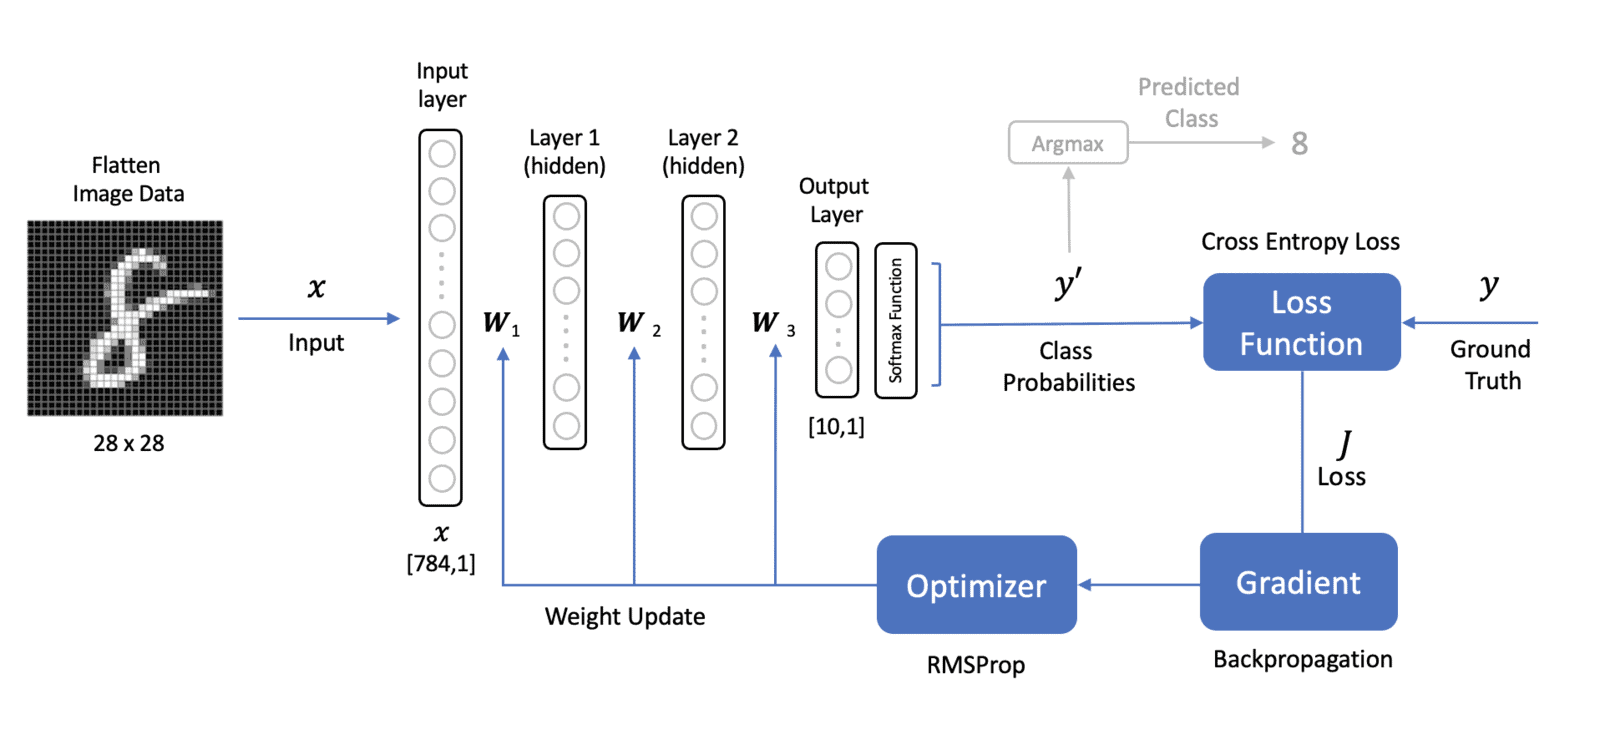

## 4- Compilation du modèle
Dans cette section, le modèle est compilé avec l'optimiseur RMSprop (Root Mean Square propagation), la fonction de perte "categorical_crossentropy" (car il s'agit d'un problème de classification multiclasse) et la métrique d'exactitude pour évaluer les performances du modèle pendant l'entraînement.

In [ ]:
# Intanciation du modèle.
model = tf.keras.Sequential()
 
# construction du modèle.
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,  activation="softmax"))
 
# La méthode summary() est appelée pour afficher un résumé de l'architecture du modèle, y compris le nombre de paramètres dans chaque couche.
model.summary()

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 5- Entrainement du modèle
Le modèle est entraîné dans cette section en utilisant les données d'entraînement et de validation. Les résultats de l'entraînement sont stockés dans l'objet training_results.

In [ ]:
training_results = model.fit(X_train, 
                             y_train, 
                             epochs=21, 
                             batch_size=64, 
                             validation_data=(X_valid, y_valid));

## 6- Interprétation des resultats de l'entrainement
Cette section comprend des fonctions pour tracer les courbes de perte et d'exactitude à la fois pour les données d'entraînement et de validation. 

In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not isinstance(metric_name, (list, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

In [ ]:

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]
 
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

Notons que le modèle montre des signes de surapprentissage car la perte de validation commence à augmenter après un certain nombre d'époques, tandis que la perte d'entraînement continue de diminuer.

## 7- Evaluation du modèle

Cette section montre comment utiliser le modèle entraîné pour faire des prédictions sur les données de test. Elle imprime également les scores de prédiction pour chaque classe. De plus, une matrice de confusion est générée pour évaluer les performances du modèle sur les données de test.

In [ ]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

### Matrice de confusion
Une matrice de confusion est une métrique très courante utilisée pour résumer les résultats d'un problème de classification. Les informations sont présentées sous la forme d'un tableau ou d'une matrice où un axe représente les étiquettes de vérité pour chaque classe et l'autre axe représente les étiquettes prédites du réseau. Les entrées du tableau représentent le nombre d'instances d'une expérience. La génération d'une matrice de confusion dans TensorFlow s'effectue en appelant la fonction tf.math.confusion_matrix(), qui prend deux arguments requis qui sont la liste des étiquettes de vérité terrain et les étiquettes prédites associées.

In [ ]:
# generation de la prediction pour les données test
predictions = model.predict(X_test)
 
# pour chaque image des données test on selectionne la classe avec la plus grande probabilité
predicted_labels = [np.argmax(i) for i in predictions]

In [ ]:
# reconversion des etiquettes one hot en entier
y_test_integer_labels = tf.argmax(y_test, axis=1)
 
# generation de la matrice de confusion
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)
 
# affichage de la matrice de confusion
plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()